In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression, Lasso, ElasticNet
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

import housing **data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSBA6156_APML/data.csv')

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


drop data based on price


In [ ]:
data.drop(data[data.price == 0.0].index, inplace=True)

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


plot all features

In [ ]:
prices = data['price']
bedrooms = data['bedrooms']
bathrooms = data['bathrooms']
sqft_living = data['sqft_living']
sqft_lot = data['sqft_lot']
floors = data['floors']
views = data['view']
conditions = data['condition']
sqft_above = data['sqft_above']
sqft_basement = data.sqft_basement
year_built = data.yr_built
year_renovated = data.yr_renovated

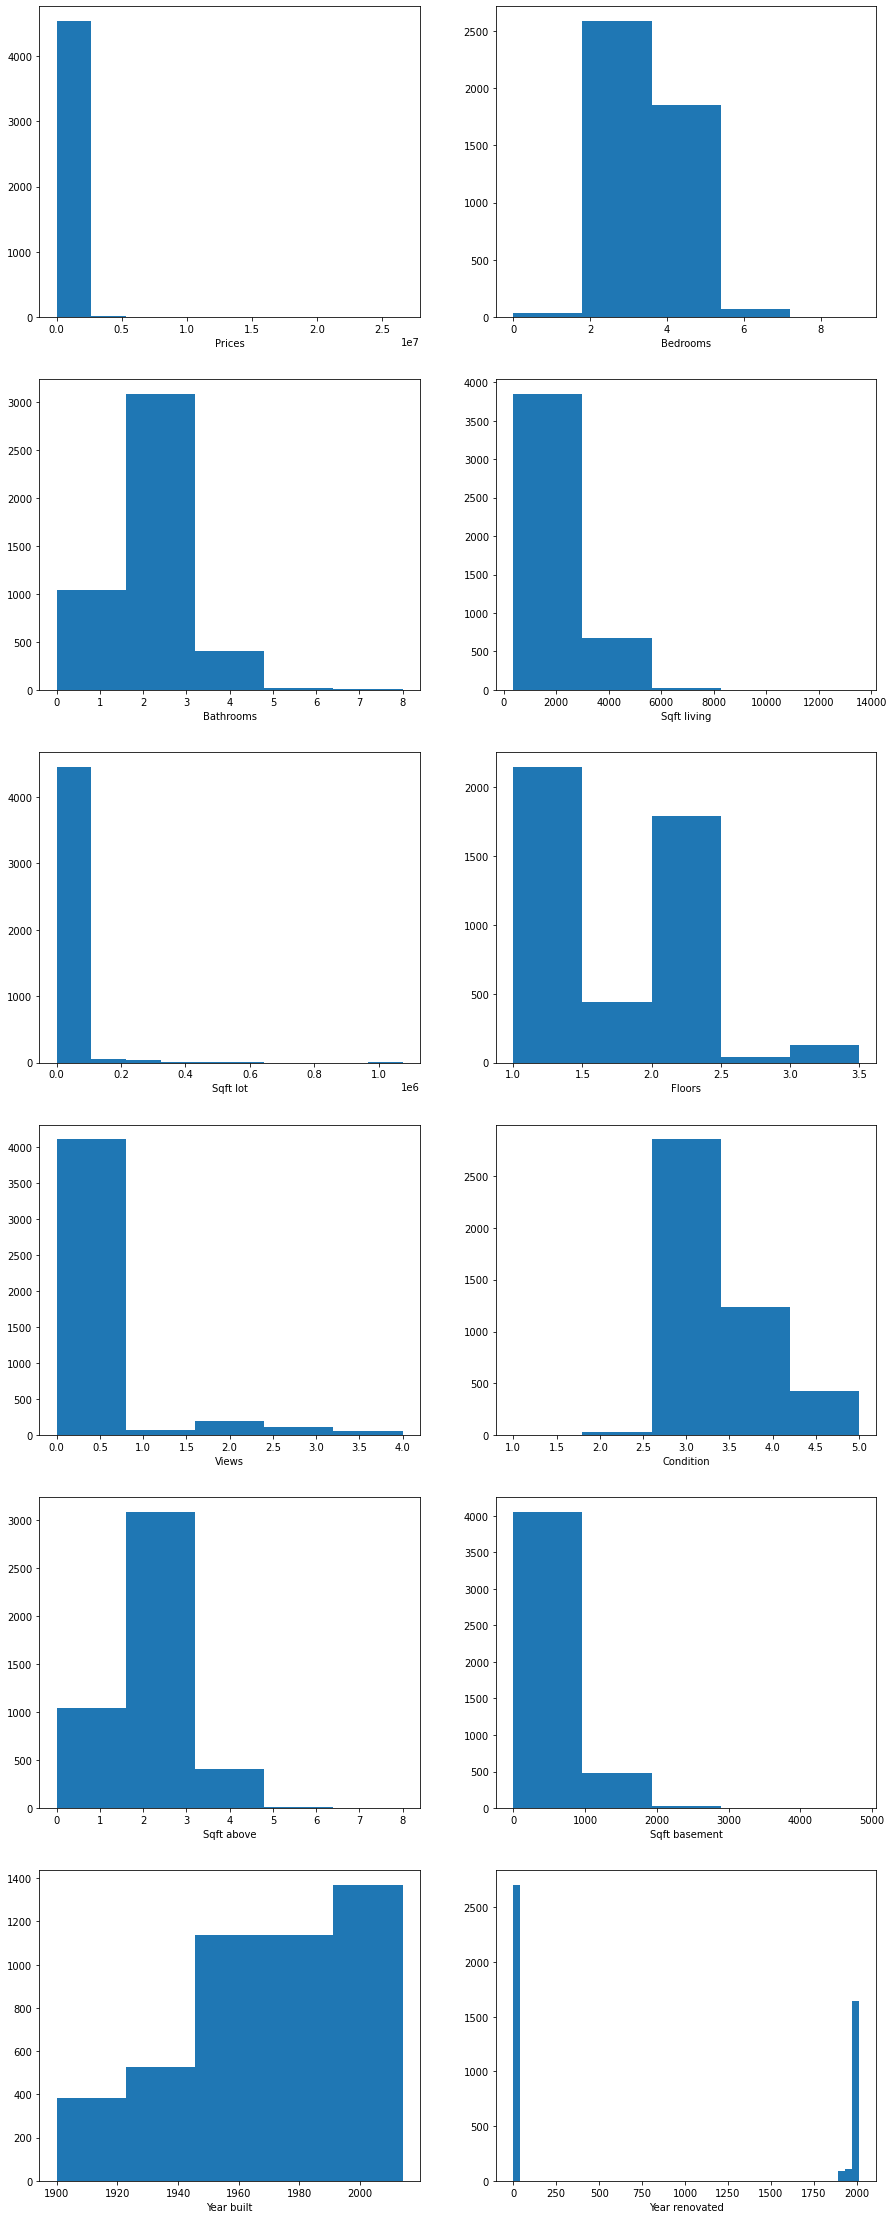

In [ ]:
plt.figure(figsize=(15, 40))
ax1 = plt.subplot(6,2,1)
ax1.hist(prices, bins=10)
ax1.set_xlabel('Prices')

ax2 = plt.subplot(6,2,2)
ax2.hist(bedrooms, bins=5)
ax2.set_xlabel('Bedrooms')

ax3 = plt.subplot(6,2,3)
ax3.hist(bathrooms, bins=5)
ax3.set_xlabel('Bathrooms')

ax4 = plt.subplot(6,2,4)
ax4.hist(sqft_living, bins=5)
ax4.set_xlabel('Sqft living')

ax5 = plt.subplot(6,2,5)
ax5.hist(sqft_lot, bins=10)
ax5.set_xlabel('Sqft lot')

ax6 = plt.subplot(6,2,6)
ax6.hist(floors, bins=5)
ax6.set_xlabel('Floors')

ax7 = plt.subplot(6,2,7)
ax7.hist(views, bins=5)
ax7.set_xlabel('Views')

ax8 = plt.subplot(6,2,8)
ax8.hist(conditions, bins=5)
ax8.set_xlabel('Condition')

ax9 = plt.subplot(6,2,9)
ax9.hist(bathrooms, bins=5)
ax9.set_xlabel('Sqft above')

ax10 = plt.subplot(6,2,10)
ax10.hist(sqft_basement, bins=5)
ax10.set_xlabel('Sqft basement')

ax11 = plt.subplot(6,2,11)
ax11.hist(year_built, bins=5)
ax11.set_xlabel('Year built')

ax12 = plt.subplot(6,2,12)
ax12.hist(year_renovated, bins=50)
ax12.set_xlabel('Year renovated')

plt.show()

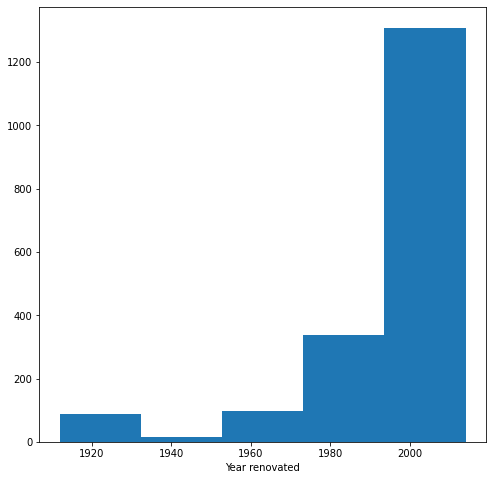

In [ ]:
year_renovated = data.drop(data[data.yr_renovated == 0].index, inplace=False).yr_renovated
plt.figure(figsize=(8, 8))
plt.hist(year_renovated, bins=5)
plt.xlabel('Year renovated')
plt.show()

In [ ]:
bedrooms = data['bedrooms']
bathrooms = data['bathrooms']
sqft_living = data['sqft_living']
sqft_lot = data['sqft_lot']
floors = data['floors']
views = data['view']
conditions = data['condition']
sqft_above = data['sqft_above']
sqft_basement = data.sqft_basement
year_built = data.yr_built
year_renovated = data.yr_renovated

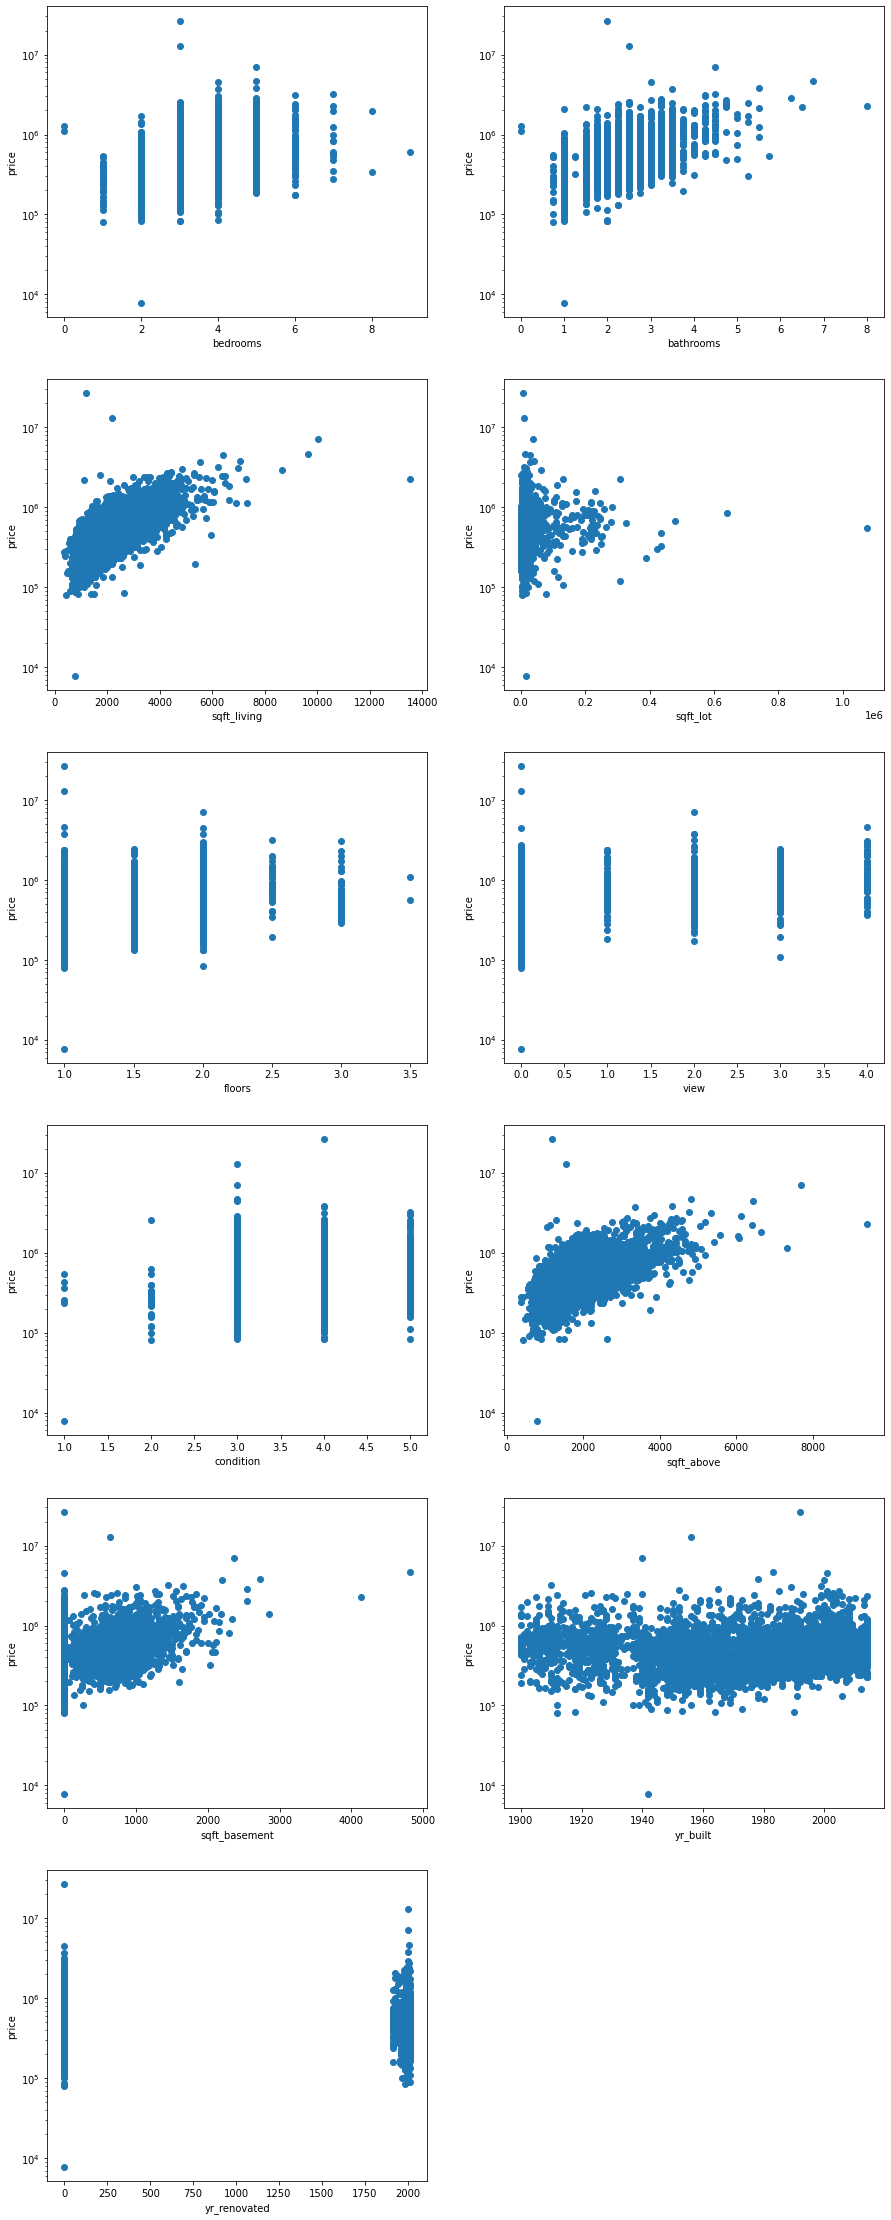

In [ ]:
plt.figure(figsize=(15, 40))
ax1 = plt.subplot(6,2,1)
ax1.scatter(bedrooms, prices)
ax1.set_yscale('log')
ax1.set_xlabel('bedrooms')
ax1.set_ylabel('price')

ax2 = plt.subplot(6,2,2)
ax2.scatter(bathrooms, prices)
ax2.set_yscale('log')
ax2.set_xlabel('bathrooms')
ax2.set_ylabel('price')

ax3 = plt.subplot(6,2,3)
ax3.scatter(sqft_living, prices)
ax3.set_yscale('log')
ax3.set_xlabel('sqft_living')
ax3.set_ylabel('price')

ax4 = plt.subplot(6,2,4)
ax4.scatter(sqft_lot, prices)
ax4.set_yscale('log')
ax4.set_xlabel('sqft_lot')
ax4.set_ylabel('price')

ax5 = plt.subplot(6,2,5)
ax5.scatter(floors, prices)
ax5.set_yscale('log')
ax5.set_xlabel('floors')
ax5.set_ylabel('price')

ax6 = plt.subplot(6,2,6)
ax6.scatter(views, prices)
ax6.set_yscale('log')
ax6.set_xlabel('view')
ax6.set_ylabel('price')

ax7 = plt.subplot(6,2,7)
ax7.scatter(conditions, prices)
ax7.set_yscale('log')
ax7.set_xlabel('condition')
ax7.set_ylabel('price')

ax8 = plt.subplot(6,2,8)
ax8.scatter(sqft_above, prices)
ax8.set_yscale('log')
ax8.set_xlabel('sqft_above')
ax8.set_ylabel('price')

ax9 = plt.subplot(6,2,9)
ax9.scatter(sqft_basement, prices)
ax9.set_yscale('log')
ax9.set_xlabel('sqft_basement')
ax9.set_ylabel('price')

ax10 = plt.subplot(6,2,10)
ax10.scatter(year_built, prices)
ax10.set_yscale('log')
ax10.set_xlabel('yr_built')
ax10.set_ylabel('price')

ax11 = plt.subplot(6,2,11)
ax11.scatter(year_renovated, prices)
ax11.set_yscale('log')
ax11.set_xlabel('yr_renovated')
ax11.set_ylabel('price')


plt.show()

In [ ]:
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)

In [ ]:
data[['waterfront']] = data[['waterfront']].astype('str')
categorical_features = ['city', 'statezip', 'country', 'waterfront']
continuous_features = [feature for feature in list(data.columns) if feature not in categorical_features and feature != 'date' and feature != 'price' and feature != 'street']
all_features = continuous_features + categorical_features

split train and test

In [ ]:
price_df = data.iloc[:,1]
features_df = data[all_features]
X_trainval_pipe, X_test_pipe, y_trainval_pipe, y_test_pipe = train_test_split(features_df, price_df, test_size=0.2)
category_check = features_df.dtypes == object
category_check

bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
city              True
statezip          True
country           True
waterfront        True
dtype: bool

Linear Regression

In [ ]:
from sklearn.impute import SimpleImputer
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, LinearRegression())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.36


In [ ]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, LinearRegression())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.65


Ridge Regression

In [ ]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
mridge = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Ridge())
mridge.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(mridge, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.36


In [ ]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
mridge = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Ridge())
mridge.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(mridge, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.65


Lasso

In [ ]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(max_iter=1000, tol=10000.008))
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.35


In [ ]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(max_iter=5000, tol=1000.009))
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.49


Elastic Net

In [ ]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.04


In [ ]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.49


OneHotEncoder

In [ ]:
for feature in features_df.iteritems():
  if feature[0] in categorical_features:
    features_df = pd.get_dummies(features_df)

In [ ]:
features_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,...,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA,waterfront_0,waterfront_1
0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,...,0,0,0,0,0,0,0,1,1,0
1,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,...,0,0,0,0,0,0,0,1,1,0
2,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,...,0,0,0,0,0,0,0,1,1,0
3,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,...,0,0,0,0,0,0,0,1,1,0
4,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(features_df, price_df, test_size=0.3)

GridSearchCV

In [ ]:
pipelr = make_pipeline(SimpleImputer(strategy='most_frequent'), Ridge())
pgrid = {"ridge__alpha" : np.logspace(-3, 3, 13)}
glr = GridSearchCV(pipelr, pgrid, cv=5, return_train_score=True)
glr.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.2f}".format(glr.best_score_))
print("best parameters: {}".format(glr.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.02312e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.10866e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


best mean cross-validation score: 0.47
best parameters: {'ridge__alpha': 10.0}


In [ ]:
mridge = make_pipeline(SimpleImputer(strategy='most_frequent'), Ridge(alpha=10.0))
mridge.fit(X_trainval, y_trainval)
scores = cross_val_score(mridge, X_trainval, y_trainval, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.47


Lasso GridSearch

In [ ]:
import warnings
with warnings.catch_warnings(record=True) as w:
  lspipe = make_pipeline(SimpleImputer(strategy='mean'), Lasso())
  pgrid = {"lasso__alpha" : range(10, 3100, 50)}
  gridl = GridSearchCV(lspipe, pgrid, cv=5, return_train_score=True)
  gridl.fit(X_trainval, y_trainval)
  print("best mean cross-validation score: {:.2f}".format(gridl.best_score_))
  print("best parameters: {}".format(gridl.best_params_))

best mean cross-validation score: 0.46
best parameters: {'lasso__alpha': 110}


In [ ]:
mlasso = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(alpha=310))
mlasso.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(mlasso, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.2f}".format(np.mean(scores)))

score: 0.65


Elastic Net GridSearchCV

In [ ]:
with warnings.catch_warnings(record=True) as w:
  pipen = make_pipeline(SimpleImputer(strategy='mean'), ElasticNet())
  pgrid = {'elasticnet__alpha': np.logspace(-5, 1, 12),
                'elasticnet__l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}
  gridn = GridSearchCV(pipen, pgrid, cv=5, return_train_score=True)
  gridn.fit(X_trainval, y_trainval)
  print("best mean cross-validation score: {:.2f}".format(gridn.best_score_))
  print("best parameters: {}".format(gridn.best_params_))

best mean cross-validation score: 0.47
best parameters: {'elasticnet__alpha': 0.06579332246575675, 'elasticnet__l1_ratio': 0.9}


In [ ]:
with warnings.catch_warnings(record=True) as w:
  modeln = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet(alpha=0.021544346900318822, l1_ratio=0.95))
  modeln.fit(X_trainval_pipe, y_trainval_pipe)
  scores = cross_val_score(modeln, X_trainval_pipe, y_trainval_pipe, cv=5)
  print("score: {:.2f}".format(np.mean(scores)))

score: 0.65


In [ ]:
print("test-set score: {:.2f}".format(gridl.score(X_test, y_test)))

test-set score: 0.71


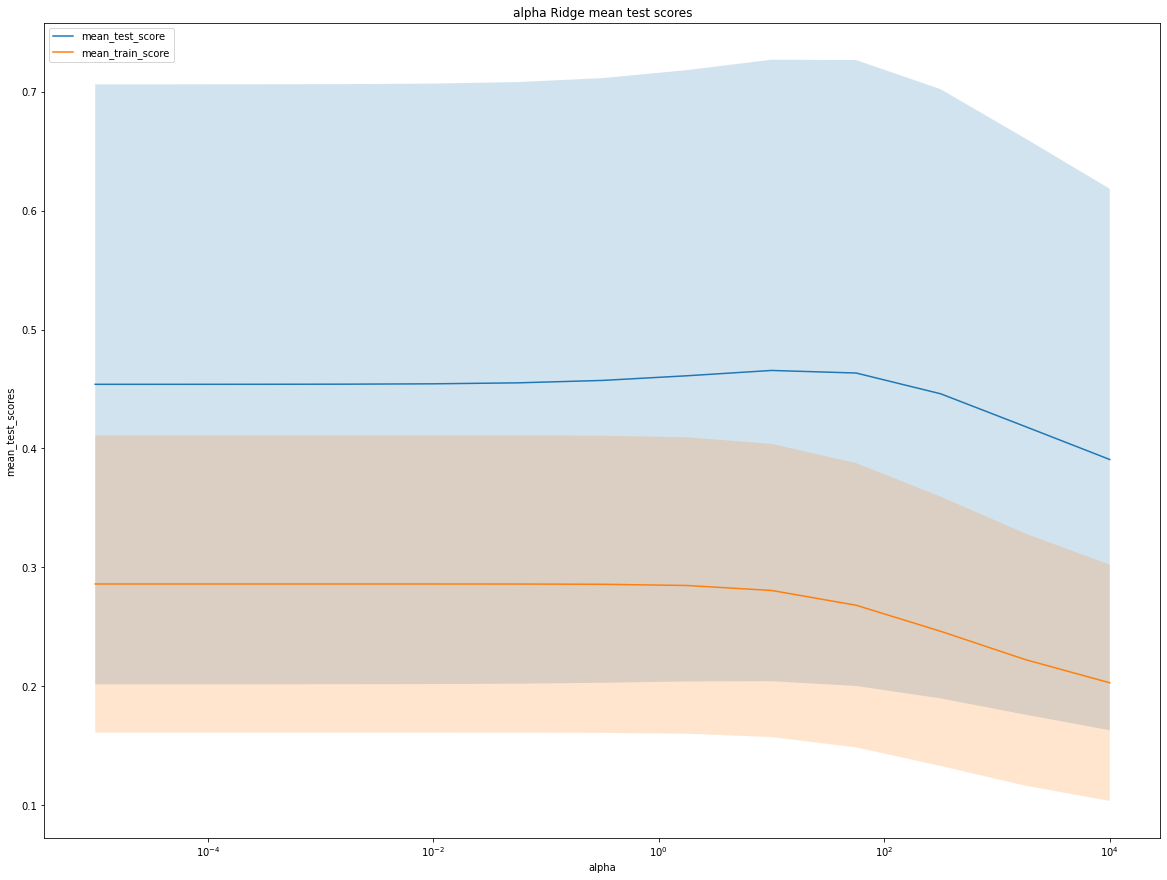

In [ ]:
alphalr = np.logspace(-5, 4, 13)
lr_mean_test_scores = np.asarray(glr.cv_results_['mean_test_score'])
lr_mean_train_scores = np.asarray(glr.cv_results_['mean_train_score'])
std_test = np.asarray(glr.cv_results_['std_test_score'])
std_train = np.asarray(glr.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(20,15))

ax.plot(alphalr, lr_mean_test_scores, label='mean_test_score')
ax.plot(alphalr, lr_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(alphalr, lr_mean_test_scores + std_test, lr_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(alphalr, lr_mean_train_scores+std_train, lr_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='alpha', ylabel='mean_test_scores',
       title='alpha Ridge mean test scores')
ax.legend(loc='upper left')

plt.show()

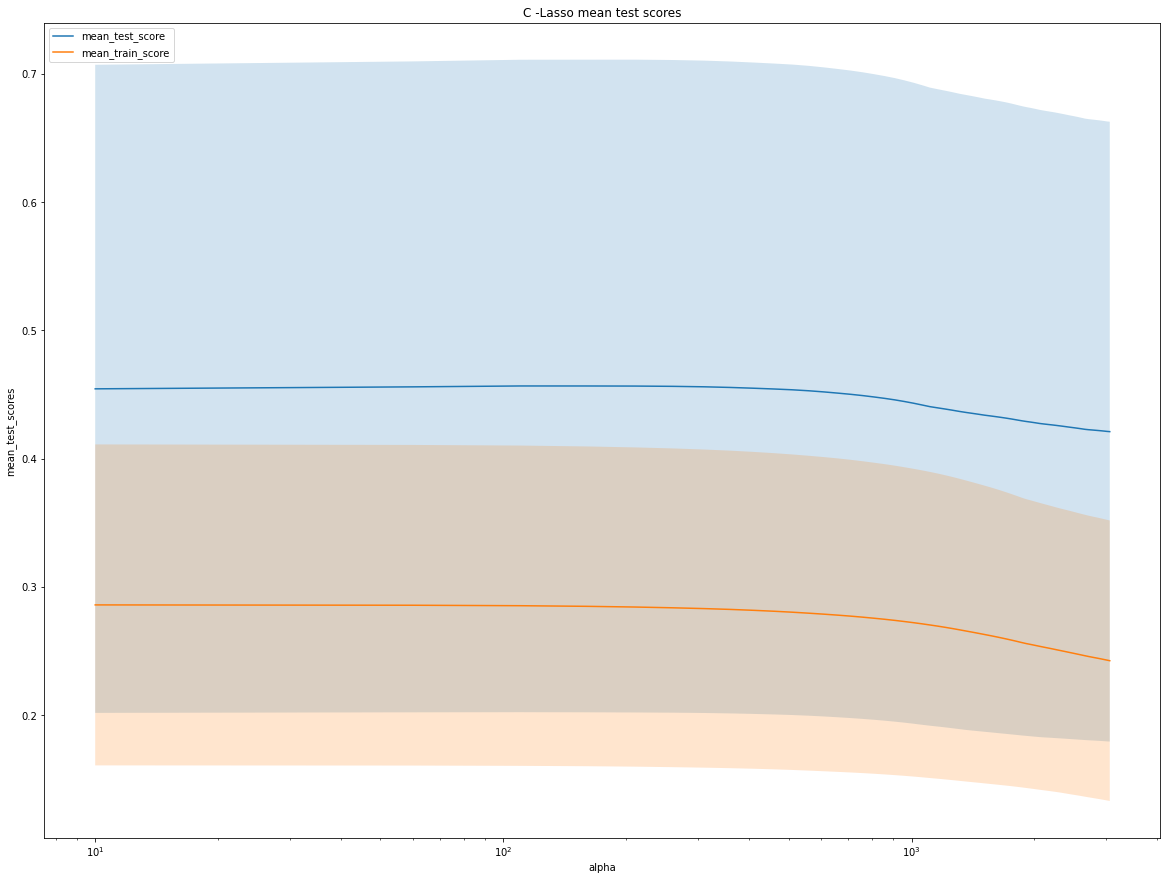

In [ ]:
alphal = range(10, 3100, 50)
l_mean_test_scores = np.asarray(gridl.cv_results_['mean_test_score'])
l_mean_train_scores = np.asarray(gridl.cv_results_['mean_train_score'])
std_test = np.asarray(gridl.cv_results_['std_test_score'])
std_train = np.asarray(gridl.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(20,15))

ax.plot(alphal, l_mean_test_scores, label='mean_test_score')
ax.plot(alphal, l_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(alphal, l_mean_test_scores + std_test, l_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(alphal, l_mean_train_scores+std_train, l_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='alpha', ylabel='mean_test_scores',
       title='C -Lasso mean test scores')
ax.legend(loc='upper left')

plt.show()

heatmap to compare results


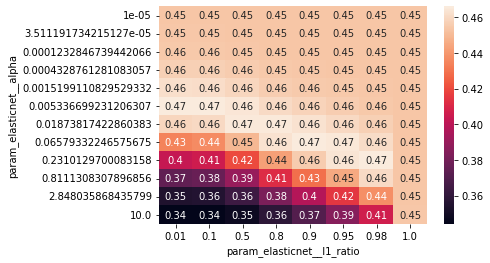

In [ ]:
import seaborn as sns
res1 = pd.pivot_table(pd.DataFrame(gridn.cv_results_),
    values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
sns.heatmap(res1, annot=True)
plt.show()

Visualization for20  most important coefficients

In [ ]:
categorical_fe = data[categorical_features]
ohe = OneHotEncoder()
ohe.fit_transform(categorical_fe)
encoded_categories = list(ohe.get_feature_names_out(categorical_features))
all_features = continuous_features + encoded_categories

In [ ]:
cnts = mridge.steps[1][1].coef_

In [ ]:
coftup = []
for index, coeff in enumerate(cnts):
  coftup.append((index, coeff))
sortup = sorted(coftup, key = lambda x: x[1])

In [ ]:
bescof = sortup[-20:]
indices = [ tup[0] for tup in bescof ]
coeffs = [tup[1] for tup in bescof]
features = []
for index in indices:
  features.append(all_features[index])

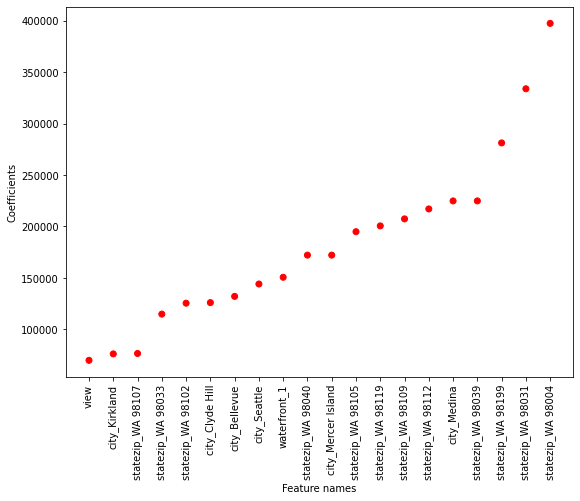

In [ ]:
cofname = [tup[1] for tup in bescof]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('Coefficients')
ax11.scatter(features, cofname, c=np.sign(cofname), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()